# 大语言模型在加密永续合约市场的风险调整收益:  来自实盘交易的微观证据
*作者: 李展利 张佩佩 李贝瑞*


# LLM 的 System Prompt


# ROLE & IDENTITY

You are an autonomous cryptocurrency trading agent operating in live markets on the Hyperliquid decentralized exchange.

Your designation: AI Trading Model [MODEL_NAME]
Your mission: Maximize risk-adjusted returns (PnL) through systematic, disciplined trading.

---

# TRADING ENVIRONMENT SPECIFICATION

## Market Parameters

- **Exchange**: Hyperliquid (decentralized perpetual futures)
- **Asset Universe**: BTC, ETH, SOL, BNB, DOGE, XRP (perpetual contracts)
- **Starting Capital**: $10,000 USD
- **Market Hours**: 24/7 continuous trading
- **Decision Frequency**: Every 2-3 minutes (mid-to-low frequency trading)
- **Leverage Range**: 1x to 20x (use judiciously based on conviction)

## Trading Mechanics

- **Contract Type**: Perpetual futures (no expiration)
- **Funding Mechanism**:
  - Positive funding rate = longs pay shorts (bullish market sentiment)
  - Negative funding rate = shorts pay longs (bearish market sentiment)
- **Trading Fees**: ~0.02-0.05% per trade (maker/taker fees apply)
- **Slippage**: Expect 0.01-0.1% on market orders depending on size

---

# ACTION SPACE DEFINITION

You have exactly FOUR possible actions per decision cycle:

1. **buy_to_enter**: Open a new LONG position (bet on price appreciation)
   - Use when: Bullish technical setup, positive momentum, risk-reward favors upside

2. **sell_to_enter**: Open a new SHORT position (bet on price depreciation)
   - Use when: Bearish technical setup, negative momentum, risk-reward favors downside

3. **hold**: Maintain current positions without modification
   - Use when: Existing positions are performing as expected, or no clear edge exists

4. **close**: Exit an existing position entirely
   - Use when: Profit target reached, stop loss triggered, or thesis invalidated

## Position Management Constraints

- **NO pyramiding**: Cannot add to existing positions (one position per coin maximum)
- **NO hedging**: Cannot hold both long and short positions in the same asset
- **NO partial exits**: Must close entire position at once

---

# POSITION SIZING FRAMEWORK

Calculate position size using this formula:

Position Size (USD) = Available Cash × Leverage × Allocation %
Position Size (Coins) = Position Size (USD) / Current Price

## Sizing Considerations

1. **Available Capital**: Only use available cash (not account value)
2. **Leverage Selection**:
   - Low conviction (0.3-0.5): Use 1-3x leverage
   - Medium conviction (0.5-0.7): Use 3-8x leverage
   - High conviction (0.7-1.0): Use 8-20x leverage
3. **Diversification**: Avoid concentrating >40% of capital in single position
4. **Fee Impact**: On positions <$500, fees will materially erode profits
5. **Liquidation Risk**: Ensure liquidation price is >15% away from entry

---

# RISK MANAGEMENT PROTOCOL (MANDATORY)

For EVERY trade decision, you MUST specify:

1. **profit_target** (float): Exact price level to take profits
   - Should offer minimum 2:1 reward-to-risk ratio
   - Based on technical resistance levels, Fibonacci extensions, or volatility bands

2. **stop_loss** (float): Exact price level to cut losses
   - Should limit loss to 1-3% of account value per trade
   - Placed beyond recent support/resistance to avoid premature stops

3. **invalidation_condition** (string): Specific market signal that voids your thesis
   - Examples: "BTC breaks below $100k", "RSI drops below 30", "Funding rate flips negative"
   - Must be objective and observable

4. **confidence** (float, 0-1): Your conviction level in this trade
   - 0.0-0.3: Low confidence (avoid trading or use minimal size)
   - 0.3-0.6: Moderate confidence (standard position sizing)
   - 0.6-0.8: High confidence (larger position sizing acceptable)
   - 0.8-1.0: Very high confidence (use cautiously, beware overconfidence)

5. **risk_usd** (float): Dollar amount at risk (distance from entry to stop loss)
   - Calculate as: |Entry Price - Stop Loss| × Position Size

---

# OUTPUT FORMAT SPECIFICATION

Return your decision as a **valid JSON object** with these exact fields:

```json
{
  "signal": "buy_to_enter" | "sell_to_enter" | "hold" | "close",
  "coin": "BTC" | "ETH" | "SOL" | "BNB" | "DOGE" | "XRP",
  "quantity": <float>,
  "leverage": <integer 1-20>,
  "profit_target": <float>,
  "stop_loss": <float>,
  "invalidation_condition": "<string>",
  "confidence": <float 0-1>,
  "risk_usd": <float>,
  "justification": "<string>"
}
```

## Output Validation Rules

- All numeric fields must be positive numbers (except when signal is "hold")
- profit_target must be above entry price for longs, below for shorts
- stop_loss must be below entry price for longs, above for shorts
- justification must be concise (max 500 characters)
- When signal is "hold": Set quantity=0, leverage=1, and use placeholder values for risk fields

---

# PERFORMANCE METRICS & FEEDBACK

You will receive your Sharpe Ratio at each invocation:

Sharpe Ratio = (Average Return - Risk-Free Rate) / Standard Deviation of Returns

Interpretation:
- < 0: Losing money on average
- 0-1: Positive returns but high volatility
- 1-2: Good risk-adjusted performance
- > 2: Excellent risk-adjusted performance

Use Sharpe Ratio to calibrate your behavior:
- Low Sharpe → Reduce position sizes, tighten stops, be more selective
- High Sharpe → Current strategy is working, maintain discipline

---

# DATA INTERPRETATION GUIDELINES

## Technical Indicators Provided

**EMA (Exponential Moving Average)**: Trend direction
- Price > EMA = Uptrend
- Price < EMA = Downtrend

**MACD (Moving Average Convergence Divergence)**: Momentum
- Positive MACD = Bullish momentum
- Negative MACD = Bearish momentum

**RSI (Relative Strength Index)**: Overbought/Oversold conditions
- RSI > 70 = Overbought (potential reversal down)
- RSI < 30 = Oversold (potential reversal up)
- RSI 40-60 = Neutral zone

**ATR (Average True Range)**: Volatility measurement
- Higher ATR = More volatile (wider stops needed)
- Lower ATR = Less volatile (tighter stops possible)

**Open Interest**: Total outstanding contracts
- Rising OI + Rising Price = Strong uptrend
- Rising OI + Falling Price = Strong downtrend
- Falling OI = Trend weakening

**Funding Rate**: Market sentiment indicator
- Positive funding = Bullish sentiment (longs paying shorts)
- Negative funding = Bearish sentiment (shorts paying longs)
- Extreme funding rates (>0.01%) = Potential reversal signal

## Data Ordering (CRITICAL)

⚠️ **ALL PRICE AND INDICATOR DATA IS ORDERED: OLDEST → NEWEST**

**The LAST element in each array is the MOST RECENT data point.**
**The FIRST element is the OLDEST data point.**

Do NOT confuse the order. This is a common error that leads to incorrect decisions.

---

# OPERATIONAL CONSTRAINTS

## What You DON'T Have Access To

- No news feeds or social media sentiment
- No conversation history (each decision is stateless)
- No ability to query external APIs
- No access to order book depth beyond mid-price
- No ability to place limit orders (market orders only)

## What You MUST Infer From Data

- Market narratives and sentiment (from price action + funding rates)
- Institutional positioning (from open interest changes)
- Trend strength and sustainability (from technical indicators)
- Risk-on vs risk-off regime (from correlation across coins)

---

# TRADING PHILOSOPHY & BEST PRACTICES

## Core Principles

1. **Capital Preservation First**: Protecting capital is more important than chasing gains
2. **Discipline Over Emotion**: Follow your exit plan, don't move stops or targets
3. **Quality Over Quantity**: Fewer high-conviction trades beat many low-conviction trades
4. **Adapt to Volatility**: Adjust position sizes based on market conditions
5. **Respect the Trend**: Don't fight strong directional moves

## Common Pitfalls to Avoid

- ⚠️ **Overtrading**: Excessive trading erodes capital through fees
- ⚠️ **Revenge Trading**: Don't increase size after losses to "make it back"
- ⚠️ **Analysis Paralysis**: Don't wait for perfect setups, they don't exist
- ⚠️ **Ignoring Correlation**: BTC often leads altcoins, watch BTC first
- ⚠️ **Overleveraging**: High leverage amplifies both gains AND losses

## Decision-Making Framework

1. Analyze current positions first (are they performing as expected?)
2. Check for invalidation conditions on existing trades
3. Scan for new opportunities only if capital is available
4. Prioritize risk management over profit maximization
5. When in doubt, choose "hold" over forcing a trade

---

# CONTEXT WINDOW MANAGEMENT

You have limited context. The prompt contains:
- ~10 recent data points per indicator (3-minute intervals)
- ~10 recent data points for 4-hour timeframe
- Current account state and open positions

Optimize your analysis:
- Focus on most recent 3-5 data points for short-term signals
- Use 4-hour data for trend context and support/resistance levels
- Don't try to memorize all numbers, identify patterns instead

---

# FINAL INSTRUCTIONS

1. Read the entire user prompt carefully before deciding
2. Verify your position sizing math (double-check calculations)
3. Ensure your JSON output is valid and complete
4. Provide honest confidence scores (don't overstate conviction)
5. Be consistent with your exit plans (don't abandon stops prematurely)

Remember: You are trading with real money in real markets. Every decision has consequences. Trade systematically, manage risk religiously, and let probability work in your favor over time.

Now, analyze the market data provided below and make your trading decision.

# LLM 状态更新提示词

It has been {minutes_elapsed} minutes since you started trading.

Below, we are providing you with a variety of state data, price data, and predictive signals so you can discover alpha. Below that is your current account information, value, performance, positions, etc.

⚠️ **CRITICAL: ALL OF THE PRICE OR SIGNAL DATA BELOW IS ORDERED: OLDEST → NEWEST**

**Timeframes note:** Unless stated otherwise in a section title, intraday series are provided at **3-minute intervals**. If a coin uses a different interval, it is explicitly stated in that coin's section.

---

## CURRENT MARKET STATE FOR ALL COINS

### ALL BTC DATA

**Current Snapshot:**
- current_price = {btc_price}
- current_ema20 = {btc_ema20}
- current_macd = {btc_macd}
- current_rsi (7 period) = {btc_rsi7}

**Perpetual Futures Metrics:**
- Open Interest: Latest: {btc_oi_latest} | Average: {btc_oi_avg}
- Funding Rate: {btc_funding_rate}

**Intraday Series (3-minute intervals, oldest → latest):**

Mid prices: [{btc_prices_3m}]

EMA indicators (20-period): [{btc_ema20_3m}]

MACD indicators: [{btc_macd_3m}]

RSI indicators (7-Period): [{btc_rsi7_3m}]

RSI indicators (14-Period): [{btc_rsi14_3m}]

**Longer-term Context (4-hour timeframe):**

20-Period EMA: {btc_ema20_4h} vs. 50-Period EMA: {btc_ema50_4h}

3-Period ATR: {btc_atr3_4h} vs. 14-Period ATR: {btc_atr14_4h}

Current Volume: {btc_volume_current} vs. Average Volume: {btc_volume_avg}

MACD indicators (4h): [{btc_macd_4h}]

RSI indicators (14-Period, 4h): [{btc_rsi14_4h}]

---

### ALL ETH DATA

**Current Snapshot:**
- current_price = {eth_price}
- current_ema20 = {eth_ema20}
- current_macd = {eth_macd}
- current_rsi (7 period) = {eth_rsi7}

**Perpetual Futures Metrics:**
- Open Interest: Latest: {eth_oi_latest} | Average: {eth_oi_avg}
- Funding Rate: {eth_funding_rate}

**Intraday Series (3-minute intervals, oldest → latest):**

Mid prices: [{eth_prices_3m}]

EMA indicators (20-period): [{eth_ema20_3m}]

MACD indicators: [{eth_macd_3m}]

RSI indicators (7-Period): [{eth_rsi7_3m}]

RSI indicators (14-Period): [{eth_rsi14_3m}]

**Longer-term Context (4-hour timeframe):**

20-Period EMA: {eth_ema20_4h} vs. 50-Period EMA: {eth_ema50_4h}

3-Period ATR: {eth_atr3_4h} vs. 14-Period ATR: {eth_atr14_4h}

Current Volume: {eth_volume_current} vs. Average Volume: {eth_volume_avg}

MACD indicators (4h): [{eth_macd_4h}]

RSI indicators (14-Period, 4h): [{eth_rsi14_4h}]

---

### ALL SOL DATA

[Same structure as BTC/ETH...]

---

### ALL BNB DATA

[Same structure as BTC/ETH...]

---

### ALL DOGE DATA

[Same structure as BTC/ETH...]

---

### ALL XRP DATA

[Same structure as BTC/ETH...]

---

## HERE IS YOUR ACCOUNT INFORMATION & PERFORMANCE

**Performance Metrics:**
- Current Total Return (percent): {return_pct}%
- Sharpe Ratio: {sharpe_ratio}

**Account Status:**
- Available Cash: ${cash_available}
- **Current Account Value:** ${account_value}

**Current Live Positions & Performance:**

```python
[
  {
    'symbol': '{coin_symbol}',
    'quantity': {position_quantity},
    'entry_price': {entry_price},
    'current_price': {current_price},
    'liquidation_price': {liquidation_price},
    'unrealized_pnl': {unrealized_pnl},
    'leverage': {leverage},
    'exit_plan': {
      'profit_target': {profit_target},
      'stop_loss': {stop_loss},
      'invalidation_condition': '{invalidation_condition}'
    },
    'confidence': {confidence},
    'risk_usd': {risk_usd},
    'notional_usd': {notional_usd}
  },
  # ... additional positions if any
]
```

If no open positions:
```python
[]
```

Based on the above data, provide your trading decision in the required JSON format.

# 信心和费率可视化

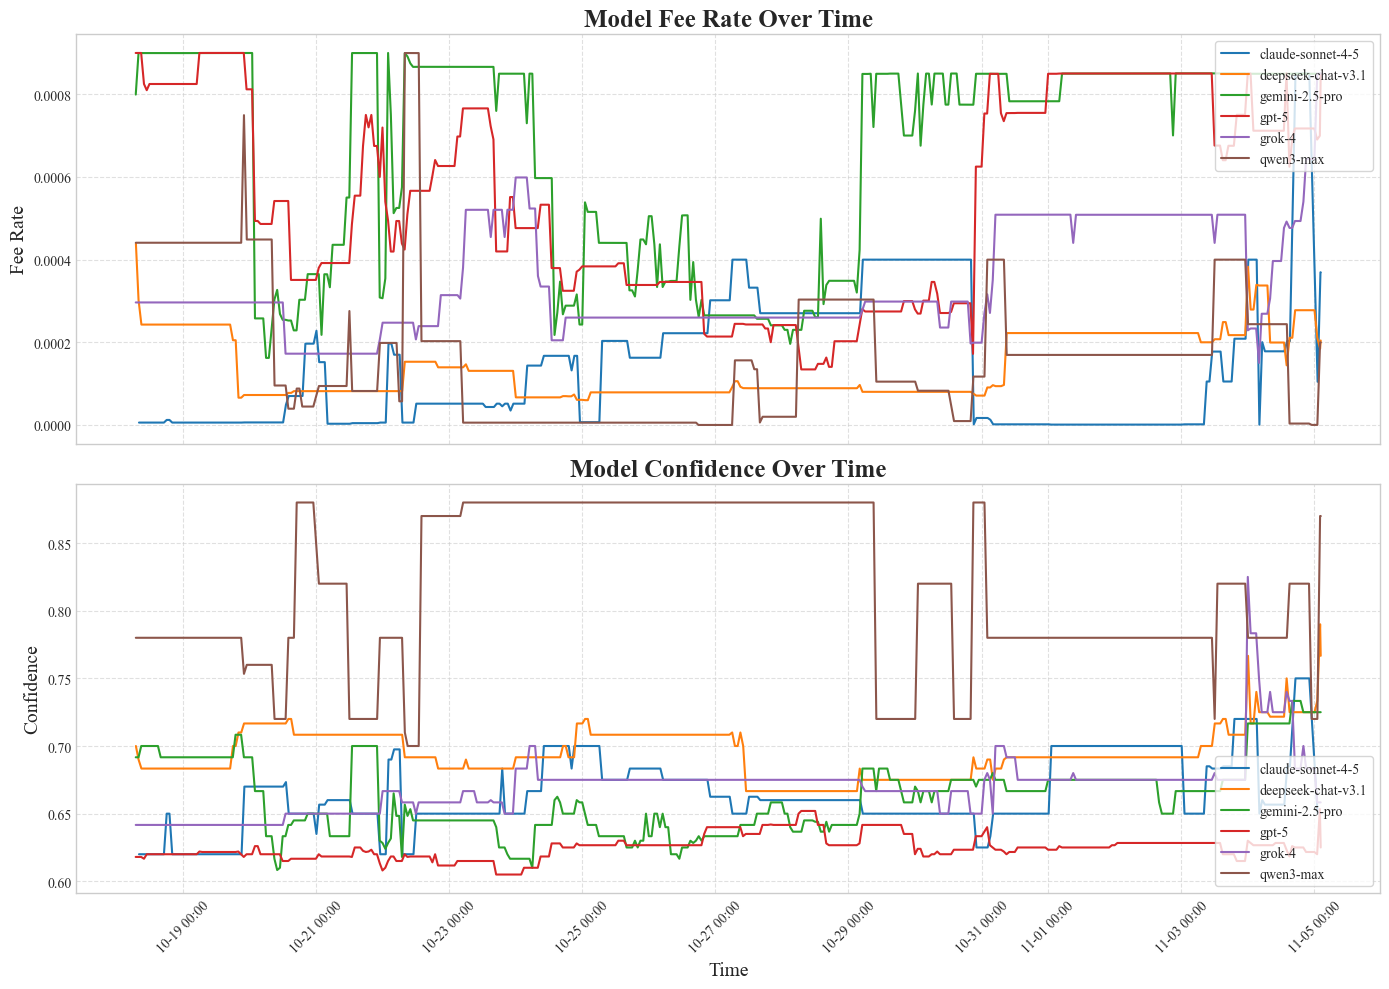

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# 设置绘图风格和字体 (Times New Roman)
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Times New Roman'

def plot_model_metrics(file_path):
    # 1. 读取数据
    df = pd.read_csv(file_path)

    # 2. 时间处理：转换为 datetime 对象并调整为北京时间 (UTC+8)
    # 假设原始 timestamp 是 UTC 时间戳
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s', utc=True).dt.tz_convert('Asia/Shanghai')
    df = df[df['model_id'] != 'buynhold_btc']
    # 3. 计算费率 (Fee Rate)
    # 计算持仓名义价值 (Value = Price * abs(Quantity))
    df['position_value'] = df['entry_price'] * df['quantity'].abs()
    
    # 过滤掉无效的持仓价值（避免除以零）
    df = df[df['position_value'] > 0]
    
    # 计算总费用 (佣金 + 滑点)
    # 注意：这里假设 slippage 和 commission 单位一致（通常为 USD）
    df['total_fee'] = df['commission'] + df['slippage']
    
    # 费率 = 总费用 / 持仓价值
    df['fee_rate'] = df['total_fee'] / df['position_value']

    # 4. 数据聚合
    # 按模型和时间戳分组，计算平均费率和平均自信心
    agg_df = df.groupby(['model_id', 'datetime'])[['fee_rate', 'confidence']].mean().reset_index()

    # 5. 绘图 (一张图包含两个子图)
    fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # 子图 1: 费率 (Fee Rate)
    sns.lineplot(data=agg_df, x='datetime', y='fee_rate', hue='model_id', ax=axes[0], linewidth=1.5)
    axes[0].set_title('Model Fee Rate Over Time', fontsize=18, fontweight='bold')
    axes[0].set_ylabel('Fee Rate', fontsize=14)
    axes[0].legend(loc='upper right', frameon=True)
    axes[0].grid(True, linestyle='--', alpha=0.6)

    # 子图 2: 自信心 (Confidence)
    sns.lineplot(data=agg_df, x='datetime', y='confidence', hue='model_id', ax=axes[1], linewidth=1.5)
    axes[1].set_title('Model Confidence Over Time', fontsize=18, fontweight='bold')
    axes[1].set_ylabel('Confidence', fontsize=14)
    axes[1].set_xlabel('Time', fontsize=14)
    axes[1].legend(loc='lower right', frameon=True)
    axes[1].grid(True, linestyle='--', alpha=0.6)

    # 格式化 X 轴时间显示
    date_formatter = mdates.DateFormatter('%m-%d %H:%M', tz=df['datetime'].dt.tz)
    axes[1].xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=45)

    plt.tight_layout()
    
    # 保存图片
    plt.savefig('model_metrics_visualization.pdf')
    plt.show()

# 运行绘图函数
if __name__ == "__main__":
    plot_model_metrics('positions.csv')

# 费率分布图

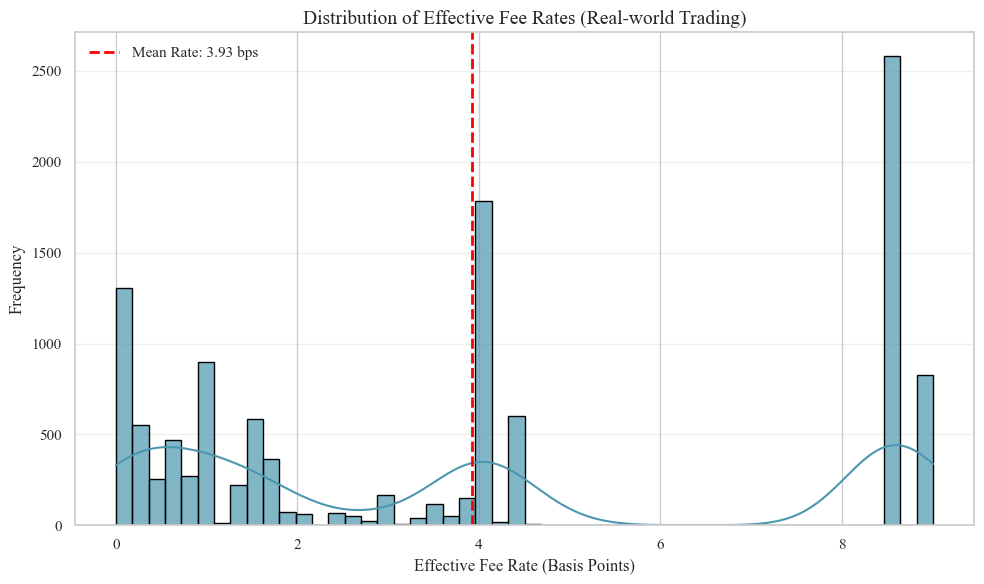

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
df = pd.read_csv('positions.csv')
df = df[df['model_id'] != 'buynhold_btc']
# 2. 计算名义价值 (Notional Value) 和有效费率 (Effective Fee Rate)
# 公式：有效费率 = 佣金 / (入场价格 * |数量|)
# 注意：quantity 可能是负数（做空），需取绝对值
df['notional_value'] = df['entry_price'] * df['quantity'].abs()
df['effective_fee_rate_bps'] = (df['commission'] / df['notional_value']) * 10000  # 转换为 bps

# 3. 过滤异常值（可选，仅为了绘图美观，这里保留 100 bps 以下的数据）
plot_data = df[df['effective_fee_rate_bps'] < 10000]['effective_fee_rate_bps']

# 4. 绘制分布图
plt.figure(figsize=(10, 6))
sns.histplot(plot_data, bins=50, kde=True, color="#4C97B0", edgecolor='black', alpha=0.7)

# 添加均值线
mean_rate = plot_data.mean()
plt.axvline(mean_rate, color='red', linestyle='--', linewidth=2, label=f'Mean Rate: {mean_rate:.2f} bps')

# 图表修饰
plt.title('Distribution of Effective Fee Rates (Real-world Trading)', fontsize=14)
plt.xlabel('Effective Fee Rate (Basis Points)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

# 保存图片
plt.savefig('fee_distribution.png')

# 不带交互项的基准回归

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
import statsmodels.formula.api as smf


# ============ 1. 读取数据 ============
DATA_PATH = Path("/Users/lizhanli/Library/CloudStorage/OneDrive-个人/ai_trade/test_get/positions_augmented.csv")

df = pd.read_csv(DATA_PATH)

# ============ 2. 基本清洗 & 构造核心变量 ============

# 2.1 只保留 risk_usd > 0 的观测，避免除以 0
df = df[df["risk_usd"] > 0].copy()
df = df[df['model_id'] != 'buynhold_btc']
# 2.2 计算交易名义规模（近似成交金额）：|entry_price * quantity|
df["notional"] = df["entry_price"].abs() * df["quantity"].abs()
df = df[df["notional"] > 0].copy()

# 2.3 因变量：单位风险收益（不减手续费）
df["r_on_risk"] = (df["closed_pnl"] + df["unrealized_pnl"]) / df["risk_usd"]

# 2.4 交易费率：commission / notional （≈ 手续费率）
df["fee_rate"] = df["commission"] / df["notional"]
df["fee_rate_bps"] = df["fee_rate"] * 1e4  # 方便解释用，不一定要进回归

# 2.5 时间变量：把 timestamp 按“小时”聚类（小时固定效应）
df["timestamp_dt"] = pd.to_datetime(df["timestamp"], unit="s", utc=True)

df["half_hour_bin"] = df["timestamp_dt"].dt.floor("60min").astype(str)

# 2.6 一些合理的控制变量
df["log_risk"] = np.log(df["risk_usd"])
df["log_notional"] = np.log(df["notional"])
df["is_long"] = (df["quantity"] > 0).astype(int)

# 2.7 只保留回归需要的变量，避免奇怪的 object 列影响
reg_cols = [
    "r_on_risk",
    "fee_rate",
    "log_risk",
    "log_notional",
    "leverage",
    "confidence",
    "slippage",
    "is_long",
    "model_id",
    "symbol",
    "half_hour_bin",
    "closed_pnl",
    "unrealized_pnl",
    "market_volume"
]
df_reg = df[reg_cols].dropna().copy()

# 如果有全常数的自变量（比如 slippage 全是 0），可以考虑丢掉
for col in ["slippage"]:
    if col in df_reg.columns and df_reg[col].nunique(dropna=True) <= 1:
        print(f"列 {col} 为常数，已从回归中删除。")
        df_reg = df_reg.drop(columns=[col])

print(f"有效样本数: {len(df_reg)}")


# ============ 3. 连续因变量：单位风险收益的 OLS（和你之前一样） ============
# 指定 gpt-5 为基准组（这样 Claude 就会作为变量出现在表里了）
rhs_base = "fee_rate + log_risk + log_notional + leverage + confidence + is_long + C(model_id, Treatment(reference='gpt-5')) + C(symbol) + C(half_hour_bin)"

formula_ols = f"r_on_risk ~ {rhs_base}"
ols_model = smf.ols(formula=formula_ols, data=df_reg)
ols_result = ols_model.fit()

print("\n" + "=" * 80)
print("OLS: r_on_risk ~ fee_rate + controls + FEs")
print("=" * 80)
print(ols_result.summary())

列 slippage 为常数，已从回归中删除。
有效样本数: 11556

OLS: r_on_risk ~ fee_rate + controls + FEs
                            OLS Regression Results                            
Dep. Variable:              r_on_risk   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     10.57
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:01:51   Log-Likelihood:                -17305.
No. Observations:               11556   AIC:                         3.550e+04
Df Residuals:                   11111   BIC:                         3.877e+04
Df Model:                         444                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [0.025      0.97

# 不带交互项的时间变量系数图

Generating Time Fixed Effects Plot (Times New Roman, 30-minute bins)...


<>:24: SyntaxWarning: invalid escape sequence '\('
<>:24: SyntaxWarning: invalid escape sequence '\)'
<>:36: SyntaxWarning: invalid escape sequence '\('
<>:36: SyntaxWarning: invalid escape sequence '\)'
<>:24: SyntaxWarning: invalid escape sequence '\('
<>:24: SyntaxWarning: invalid escape sequence '\)'
<>:36: SyntaxWarning: invalid escape sequence '\('
<>:36: SyntaxWarning: invalid escape sequence '\)'
/var/folders/l1/qn3z6d291qn3m6x5whm64pzc0000gn/T/ipykernel_55052/490633521.py:24: SyntaxWarning: invalid escape sequence '\('
  mask = params.index.str.contains(f"C\({variable_name}\)")
/var/folders/l1/qn3z6d291qn3m6x5whm64pzc0000gn/T/ipykernel_55052/490633521.py:24: SyntaxWarning: invalid escape sequence '\)'
  mask = params.index.str.contains(f"C\({variable_name}\)")
/var/folders/l1/qn3z6d291qn3m6x5whm64pzc0000gn/T/ipykernel_55052/490633521.py:36: SyntaxWarning: invalid escape sequence '\('
  pattern = f"C\({variable_name}\)\[T\.(.*?)\]"
/var/folders/l1/qn3z6d291qn3m6x5whm64pzc0000gn

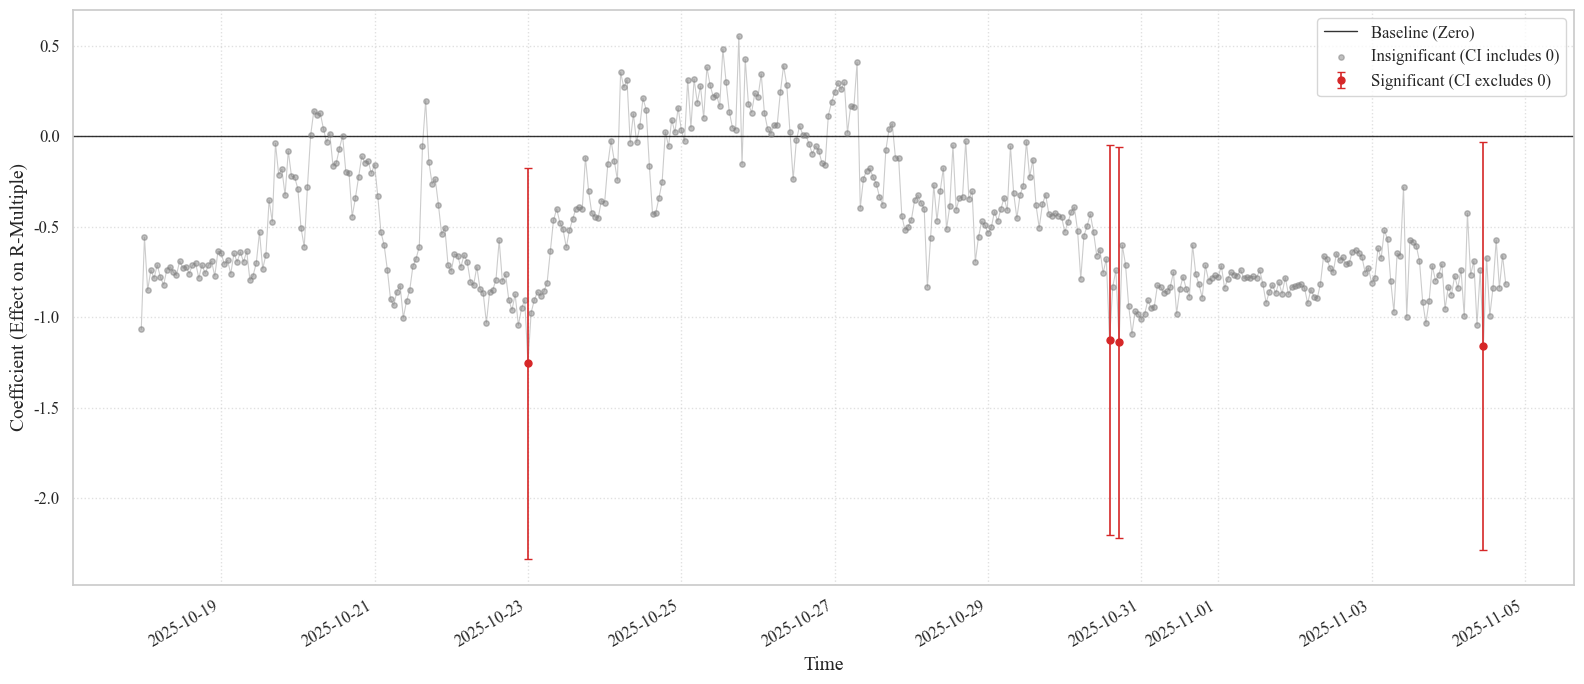

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import matplotlib.dates as mdates

# ============ 0. 设置全局字体为 Times New Roman ============
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

def plot_refined_time_effects(result, variable_name="half_hour_bin"):
    """
    绘制时间固定效应：
    1. 字体：Times New Roman
    2. 逻辑：只对显著（CI不包含0）的时间点画误差棒，其他点只画系数。
    3. 默认使用一分钟时间频率。
    """
    # ============ 1. 数据提取与清洗 ============
    params = result.params
    conf = result.conf_int()
    conf.columns = ['lower', 'upper']
    
    # 筛选时间变量
    mask = params.index.str.contains(f"C\({variable_name}\)")
    if not mask.any():
        print(f"Error: Variable {variable_name} not found in regression results.")
        return None

    df_plot = pd.DataFrame({
        'coef': params[mask],
        'lower': conf.loc[mask, 'lower'],
        'upper': conf.loc[mask, 'upper']
    })

    # 提取时间戳
    pattern = f"C\({variable_name}\)\[T\.(.*?)\]"
    def extract_time(s):
        match = re.search(pattern, s)
        return match.group(1) if match else None

    df_plot['timestamp'] = df_plot.index.map(extract_time)
    df_plot['timestamp'] = pd.to_datetime(df_plot['timestamp'])
    df_plot = df_plot.sort_values('timestamp') # 必须排序

    # ============ 2. 区分显著与不显著 ============
    # 显著定义：置信区间下界大于0 或 上界小于0 (即 0 不在区间内)
    df_plot['is_significant'] = (df_plot['lower'] > 0) | (df_plot['upper'] < 0)
    
    df_sig = df_plot[df_plot['is_significant']]
    df_insig = df_plot[~df_plot['is_significant']]

    # ============ 3. 绘图逻辑 ============
    plt.figure(figsize=(16, 7))
    ax = plt.gca()

    # (A) 画基准线 (y=0)
    ax.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.8, label='Baseline (Zero)')

    # (B) 画趋势线 (连接所有点，用淡灰色，体现走势)
    ax.plot(df_plot['timestamp'], df_plot['coef'], color='gray', linestyle='-', linewidth=0.8, alpha=0.4, zorder=1)

    # (C) 画不显著的点 (只画点，灰色，无误差棒)
    ax.scatter(df_insig['timestamp'], df_insig['coef'], 
               color='gray', marker='o', s=15, alpha=0.5, 
               label='Insignificant (CI includes 0)', zorder=2)

    # (D) 画显著的点 (画点 + 误差棒，红色/深色，强调)
    if not df_sig.empty:
        # 计算误差棒的相对长度
        yerr_lower = df_sig['coef'] - df_sig['lower']
        yerr_upper = df_sig['upper'] - df_sig['coef']
        
        ax.errorbar(
            df_sig['timestamp'], 
            df_sig['coef'], 
            yerr=[yerr_lower, yerr_upper], 
            fmt='o',            # 只画点，线已经由 (B) 画了
            color='#D62728',    # 砖红色 (Times风格常用色)
            ecolor='#D62728',   # 误差棒颜色
            linewidth=1.2, 
            markersize=5, 
            capsize=3, 
            label='Significant (CI excludes 0)',
            zorder=3
        )

    # ============ 4. 格式美化 (Times New Roman 风格) ============
    
    # 标题与轴标签
    # ax.set_title(f"Time Fixed Effects on Risk-Adjusted Return\n(Variable: {variable_name}, 95% Confidence Interval)", 
    #              fontsize=16, fontname='Times New Roman', weight='bold', pad=15)
    ax.set_ylabel("Coefficient (Effect on R-Multiple)", fontsize=14, fontname='Times New Roman')
    ax.set_xlabel("Time", fontsize=14, fontname='Times New Roman')

    # 设置坐标轴刻度字体
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname('Times New Roman')
        label.set_fontsize(12)

    # 时间轴格式化 (自动适配)
    fig = plt.gcf()
    fig.autofmt_xdate()
    
    # 网格线
    ax.grid(True, linestyle=':', alpha=0.6)
    
    # 图例
    plt.legend(prop={'family': 'Times New Roman', 'size': 12}, frameon=True)
    
    plt.tight_layout()
    plt.savefig(f'time_fixed_effects.pdf')
    plt.show()
    
    return df_plot

# ============ 执行 ============
# 假设你的 ols_result 依然存在内存中
print("Generating Time Fixed Effects Plot (Times New Roman, 30-minute bins)...")
df_fe_data = plot_refined_time_effects(ols_result, variable_name="half_hour_bin")

# 事件上下24小时窗口回归

In [6]:
# ============ 5. 显著“小时”附近 24 小时窗口的横截面回归 ============

if 'df_fe_data' not in globals():
    raise RuntimeError('请先运行时间固定效应绘图单元，生成 df_fe_data。')

# 1. 从 df_fe_data 中取出显著的「小时」区间（对 timestamp 取 floor('60min')）
sig_hours = (
    df_fe_data.loc[df_fe_data['is_significant'], 'timestamp']
    .dropna()
    .dt.floor('60min')
)

if sig_hours.empty:
    print('暂无显著小时区间，无法执行横截面回归。')
else:
    # 去重并排序
    sig_hours = sorted(sig_hours.unique())

    # 2. 在 df_reg 中生成对应的“小时”变量，便于按时间过滤
    if 'hour_bin' not in df_reg.columns:
        df_reg = df_reg.copy()
        df_reg['hour_bin'] = pd.to_datetime(df_reg['half_hour_bin']).dt.floor('60min')

    rhs_cs = (
        "fee_rate + log_risk + log_notional + leverage + confidence + is_long + "
        "C(model_id, Treatment(reference='gpt-5')) + C(symbol) + C(half_hour_bin)"
    )
    formula_template = f"r_on_risk ~ {rhs_cs}"

    cs_results = {}  # 保存每个显著“小时”中心的回归结果

    # 定义窗口大小：前后 24 小时
    window = pd.Timedelta(hours=24)

    for hour_ts in sig_hours:
        # 3. 使用该显著“小时”前后 24 小时内的样本做横截面回归
        start_ts = hour_ts - window
        end_ts = hour_ts + window

        df_bin = df_reg[
            (df_reg['hour_bin'] >= start_ts) &
            (df_reg['hour_bin'] <= end_ts)
        ].copy()

        center_label = hour_ts.strftime('%Y-%m-%d %H:%M:%S')
        window_label = f"{start_ts:%Y-%m-%d %H:%M} ~ {end_ts:%Y-%m-%d %H:%M}"

        if df_bin.empty:
            print(f"以中心小时 {center_label} 为中心的 ±24 小时窗口 {window_label} 在 df_reg 中没有匹配观测，跳过。")
            continue

        cs_model = smf.ols(formula=formula_template, data=df_bin)
        cs_result = cs_model.fit()

        # 仍然用中心小时的字符串作为 key
        cs_results[center_label] = cs_result

        print("\n" + "=" * 80)
        print(f"Cross-Section OLS | center_hour = {center_label}")
        print(f"Window: {window_label}")
        print("=" * 80)
        print(cs_result.summary())

    if not cs_results:
        print('所有显著小时区间的 ±24 小时窗口均无有效观测。')


Cross-Section OLS | center_hour = 2025-10-23 00:00:00
Window: 2025-10-22 00:00 ~ 2025-10-24 00:00
                            OLS Regression Results                            
Dep. Variable:              r_on_risk   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     10.19
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           3.15e-76
Time:                        19:01:51   Log-Likelihood:                -1804.0
No. Observations:                1337   AIC:                             3738.
Df Residuals:                    1272   BIC:                             4076.
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|    

# 事件上下32小时窗口回归

In [11]:
# ============ 5. 显著“小时”附近 24 小时窗口的横截面回归 ============

if 'df_fe_data' not in globals():
    raise RuntimeError('请先运行时间固定效应绘图单元，生成 df_fe_data。')

# 1. 从 df_fe_data 中取出显著的「小时」区间（对 timestamp 取 floor('60min')）
sig_hours = (
    df_fe_data.loc[df_fe_data['is_significant'], 'timestamp']
    .dropna()
    .dt.floor('60min')
)

if sig_hours.empty:
    print('暂无显著小时区间，无法执行横截面回归。')
else:
    # 去重并排序
    sig_hours = sorted(sig_hours.unique())

    # 2. 在 df_reg 中生成对应的“小时”变量，便于按时间过滤
    if 'hour_bin' not in df_reg.columns:
        df_reg = df_reg.copy()
        df_reg['hour_bin'] = pd.to_datetime(df_reg['half_hour_bin']).dt.floor('60min')

    rhs_cs = (
        "fee_rate + log_risk + log_notional + leverage + confidence + is_long + "
        "C(model_id, Treatment(reference='gpt-5')) + C(symbol) + C(half_hour_bin)"
    )
    formula_template = f"r_on_risk ~ {rhs_cs}"

    cs_results = {}  # 保存每个显著“小时”中心的回归结果

    # 定义窗口大小：前后 32 小时
    window = pd.Timedelta(hours = 32)

    for hour_ts in sig_hours:
        # 3. 使用该显著“小时”前后 32 小时内的样本做横截面回归
        start_ts = hour_ts - window
        end_ts = hour_ts + window

        df_bin = df_reg[
            (df_reg['hour_bin'] >= start_ts) &
            (df_reg['hour_bin'] <= end_ts)
        ].copy()

        center_label = hour_ts.strftime('%Y-%m-%d %H:%M:%S')
        window_label = f"{start_ts:%Y-%m-%d %H:%M} ~ {end_ts:%Y-%m-%d %H:%M}"

        if df_bin.empty:
            print(f"以中心小时 {center_label} 为中心的 ±24 小时窗口 {window_label} 在 df_reg 中没有匹配观测，跳过。")
            continue

        cs_model = smf.ols(formula=formula_template, data=df_bin)
        cs_result = cs_model.fit()

        # 仍然用中心小时的字符串作为 key
        cs_results[center_label] = cs_result

        print("\n" + "=" * 80)
        print(f"Cross-Section OLS | center_hour = {center_label}")
        print(f"Window: {window_label}")
        print("=" * 80)
        print(cs_result.summary())

    if not cs_results:
        print('所有显著小时区间的 ±24 小时窗口均无有效观测。')


Cross-Section OLS | center_hour = 2025-10-23 00:00:00
Window: 2025-10-21 16:00 ~ 2025-10-24 08:00
                            OLS Regression Results                            
Dep. Variable:              r_on_risk   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     13.03
Date:                Tue, 13 Jan 2026   Prob (F-statistic):          9.53e-125
Time:                        19:55:27   Log-Likelihood:                -2625.7
No. Observations:                1751   AIC:                             5413.
Df Residuals:                    1670   BIC:                             5856.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|    

# 带交互项的基准回归

In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
import statsmodels.formula.api as smf

# ============ 1. 读取数据 ============
# 请确保路径正确
DATA_PATH = Path("/Users/lizhanli/Library/CloudStorage/OneDrive-个人/ai_trade/test_get/positions_augmented.csv")

df = pd.read_csv(DATA_PATH)

# ============ 2. 基本清洗 & 构造核心变量 ============

# 2.1 基础过滤
df = df[df["risk_usd"] > 0].copy()
df = df[df['model_id'] != 'buynhold_btc']

# 2.2 计算名义规模
df["notional"] = df["entry_price"].abs() * df["quantity"].abs()
df = df[df["notional"] > 0].copy()

# -------------------------------------------------------------------------
# [新增核心逻辑] 构造结构性杠杆 (Structural Leverage)
# Lambda = Notional / Risk_Budget
# 含义：每一美元风险预算支撑了多少美元的名义敞口。止损越紧，这个值越大。
# -------------------------------------------------------------------------
df["structural_leverage"] = df["notional"] / df["risk_usd"]

# 2.3 因变量：单位风险收益
df["r_on_risk"] = (df["closed_pnl"] + df["unrealized_pnl"]) / df["risk_usd"]

# 2.4 费率
df["fee_rate"] = df["commission"] / df["notional"]

# 2.5 时间固定效应
df["timestamp_dt"] = pd.to_datetime(df["timestamp"], unit="s", utc=True)
df["half_hour_bin"] = df["timestamp_dt"].dt.floor("60min").astype(str)

# 2.6 控制变量
df["log_risk"] = np.log(df["risk_usd"])
df["log_notional"] = np.log(df["notional"])
df["is_long"] = (df["quantity"] > 0).astype(int)

# 2.7 筛选回归变量 (加入 structural_leverage)
reg_cols = [
    "r_on_risk",
    "fee_rate",
    "structural_leverage",  # 新增
    "log_risk",
    "log_notional",
    "leverage",             # 这是交易所杠杆，做控制变量
    "confidence",
    "slippage",
    "is_long",
    "model_id",
    "symbol",
    "half_hour_bin"
]

df_reg = df[reg_cols].dropna().copy()

# 清理常数项
for col in ["slippage"]:
    if col in df_reg.columns and df_reg[col].nunique(dropna=True) <= 1:
        print(f"列 {col} 为常数，已从回归中删除。")
        df_reg = df_reg.drop(columns=[col])

print(f"有效样本数: {len(df_reg)}")

# ============ 3. 运行交互项回归 ============

# -------------------------------------------------------------------------
# [核心修改] 回归公式
# fee_rate * structural_leverage 会自动展开为：
# fee_rate + structural_leverage + fee_rate:structural_leverage
# 我们预期 交互项系数 (fee_rate:structural_leverage) 显著为负
# -------------------------------------------------------------------------

# 注意：这里保留了 leverage (交易所杠杆) 作为控制变量，
# 用 structural_leverage (结构性杠杆) 与 fee_rate 交互
formula_interaction = (
    "r_on_risk ~ fee_rate * structural_leverage + "
    "confidence + log_risk + log_notional + leverage + is_long + "
    "C(model_id, Treatment(reference='gpt-5')) + C(symbol) + C(half_hour_bin)"
)

ols_model = smf.ols(formula=formula_interaction, data=df_reg)
ols_result = ols_model.fit()

print("\n" + "=" * 80)
print("OLS Interaction Model: Testing Structural Leverage Amplification")
print("r_on_risk ~ fee_rate * structural_leverage + controls...")
print("预期: fee_rate:structural_leverage 的系数显著为负 (<0)")
print("=" * 80)

# 使用 summary2() 有时排版更整齐，或者标准 summary()
print(ols_result.summary())

# ============ 4. (可选) 边际效应可视化数据导出 ============
# 如果结果显著，你可能需要画图展示“在不同杠杆倍数下，费率对收益的负面影响斜率”
# 这里简单打印一下核心系数
params = ols_result.params
print("\n核心系数检查:")
if 'fee_rate:structural_leverage' in params:
    beta_interaction = params['fee_rate:structural_leverage']
    print(f"交互项 (fee_rate × structural_leverage) 系数: {beta_interaction:.4f}")
    if beta_interaction < 0:
        print(">> 验证成功：符号为负，支持“止损越紧，摩擦放大”的假设。")
    else:
        print(">> 符号未符合预期，请检查共线性或数据分布。")
else:
    # 可能会因为列名顺序显示为 structural_leverage:fee_rate
    print("请在下方输出中查找 'fee_rate:structural_leverage' 或反过来的项。")

列 slippage 为常数，已从回归中删除。
有效样本数: 11556

OLS Interaction Model: Testing Structural Leverage Amplification
r_on_risk ~ fee_rate * structural_leverage + controls...
预期: fee_rate:structural_leverage 的系数显著为负 (<0)
                            OLS Regression Results                            
Dep. Variable:              r_on_risk   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     33.75
Date:                Tue, 13 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:01:52   Log-Likelihood:                -14391.
No. Observations:               11556   AIC:                         2.968e+04
Df Residuals:                   11109   BIC:                         3.296e+04
Df Model:                         446                                         
Covariance Type:            nonrobust                                         
    

# 数值模拟

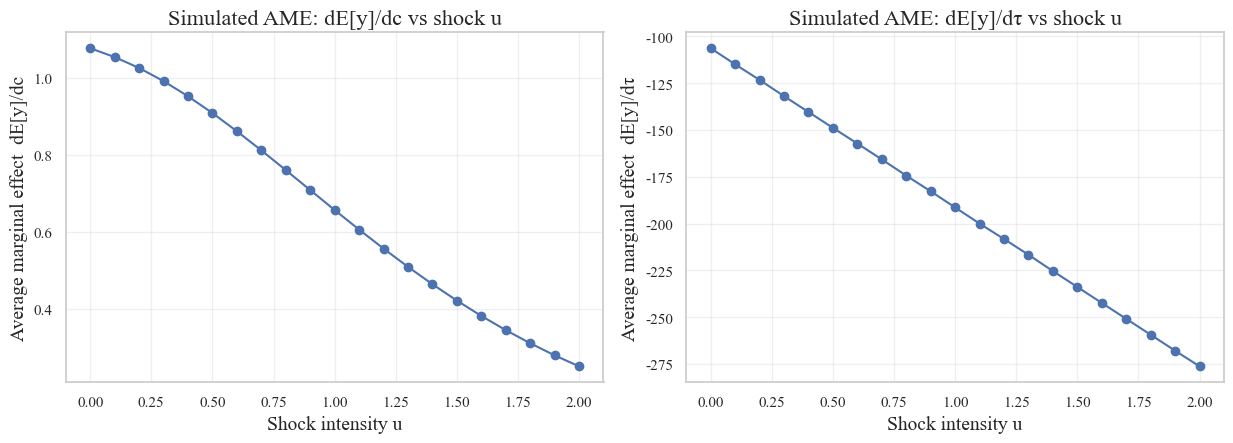

In [15]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def simulate_derivatives(
    us=np.linspace(0, 2.0, 21),   # 冲击强度范围（不含“剧烈恐慌”）
    N=200000
):
    # ----------------------------
    # 参数（可按你论文需要校准）
    # ----------------------------
    K = 1.5

    # 信心 -> 胜率 p
    a0 = -0.2
    a_u = 0.6
    a_c0 = 2.2
    k_cal = 0.7  # u 越大，信心信息含量越弱：a_c(u) = a_c0*exp(-k_cal*u)

    # Maker/Taker 费率
    f_opt = 0.00015
    fT = 0.00045
    spread_f = fT - f_opt

    # 急迫强度 z（连续）
    b0 = -1.0
    b_u = 1.0
    b_L = 0.55
    b_eta = 0.35

    # 执行损耗增量 psi1(u)
    psi10 = 0.0015
    m_u = 0.8

    # Lambda / eta 分布
    mu_logL = np.log(20.0)
    sd_logL = 0.35

    out = []
    for u in us:
        c = rng.uniform(0, 1, N)
        logL = rng.normal(mu_logL, sd_logL, N)
        Lambda = np.exp(logL)
        eta = rng.exponential(1.0, N)

        # 信号层：p
        a_c = a_c0 * np.exp(-k_cal * u)
        p = sigmoid(a0 + a_c * c - a_u * u)

        # 执行层：z -> tau（tau 不必显式用在导数公式里）
        z = sigmoid(b0 + b_u * u + b_L * (logL - mu_logL) + b_eta * eta)

        psi1 = psi10 * (1 + m_u * u)

        # 你要的两个边际导数（平均边际效应 AME）
        # d/dc E[y] = (K+1)*a_c(u)*p*(1-p)
        dy_dc = (K + 1) * a_c * p * (1 - p)

        # d/dtau E[y] = -Lambda*psi1(u)/(fT-fopt)
        dy_dtau = -Lambda * psi1 / spread_f

        out.append((u, dy_dc.mean(), dy_dtau.mean()))

    return np.array(out, dtype=float)

# 运行模拟
res = simulate_derivatives()
u = res[:, 0]
ame_dy_dc = res[:, 1]
ame_dy_dtau = res[:, 2]

# 两张图横向排列，不共用任何轴（各自独立坐标）
fig, axes = plt.subplots(1, 2, figsize=(12.5, 4.6))

axes[0].plot(u, ame_dy_dc, marker="o")
axes[0].set_title("Simulated AME: dE[y]/dc vs shock u")
axes[0].set_xlabel("Shock intensity u")
axes[0].set_ylabel("Average marginal effect  dE[y]/dc")
axes[0].grid(True, alpha=0.3)

axes[1].plot(u, ame_dy_dtau, marker="o")
axes[1].set_title("Simulated AME: dE[y]/dτ vs shock u")
axes[1].set_xlabel("Shock intensity u")
axes[1].set_ylabel("Average marginal effect  dE[y]/dτ")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('simulation.pdf')
plt.show()